In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()


X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))

In [4]:
encoded = Dense(units=32, activation='relu')(input_img)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [6]:
autoencoder = Model(input_img, decoded)

In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.3541 - acc: 0.7564 - val_loss: 0.2703 - val_acc: 0.7954
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2622 - acc: 0.7975 - val_loss: 0.2501 - val_acc: 0.7963
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2398 - acc: 0.7972 - val_loss: 0.2273 - val_acc: 0.7961
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2196 - acc: 0.7973 - val_loss: 0.2097 - val_acc: 0.7971
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2046 - acc: 0.7984 - val_loss: 0.1970 - val_acc: 0.7989
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1936 - acc: 0.7999 - val_loss: 0.1875 - val_acc: 0.8000
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0

In [11]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

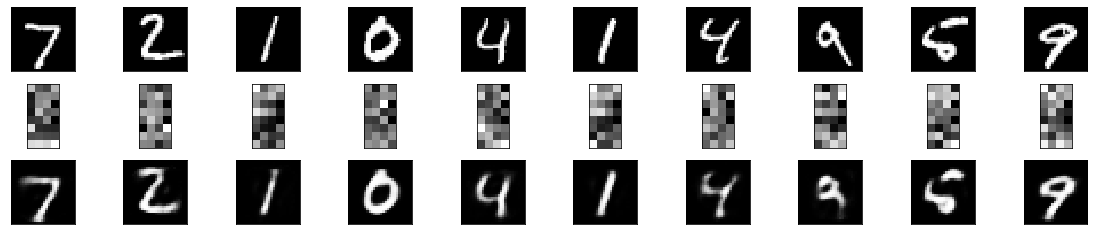

In [12]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()